In [1]:
## importing libraries and modules ##

import pandas
import numpy as np
import string

#Tokenize sentences by sentences not by words
from keras.preprocessing.text import Tokenizer

from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from keras.optimizers import Adam


import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt') 
from nltk.tokenize import RegexpTokenizer

import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nimes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nimes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Function to convert   
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s)) 

In [3]:
## Checking out the data set for training the model ##

df = pandas.read_csv('E:/Project 5 credits/Final Project/final_dataset.csv', encoding = "ISO-8859-1", header=None,low_memory=False)
df.head()

 # As the data has no column titles, we will add our own
df.columns = ["id", "previousindex", "label","tweet"]

df.head()

,id,previousindex,label,tweet
0,1,0.0,0,I'm exhausted from using so many Megan Thee St...
1,2,1.0,0,ranbooâ??s arg is gonna be less heavy / anxi...
2,3,2.0,0,"@ZiaMcCorgi555 Wandavision : ""Clinically depr..."
3,4,3.0,0,@ellamAYNiaa @BigDaddySamurai @shaurya__kumar ...
4,5,4.0,0,"Athe than , no time for depression all peh pun..."


In [4]:
df.columns[df.isnull().any()].tolist()

['previousindex']

In [5]:
del df["previousindex"]
df.isnull().any().any()

False

In [6]:
df.info(null_counts=True)

c:\users\nimes\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200001 entries, 0 to 200000
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      200001 non-null  int64 
 1   label   200001 non-null  object
 2   tweet   200001 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.6+ MB


In [7]:
print(df)

            id label                                              tweet
0            1     0  I'm exhausted from using so many Megan Thee St...
1            2     0  ranbooâ??s arg is gonna be   less heavy / anxi...
2            3     0  @ZiaMcCorgi555 Wandavision :  "Clinically depr...
3            4     0  @ellamAYNiaa @BigDaddySamurai @shaurya__kumar ...
4            5     0  Athe than , no time for depression all peh pun...
...        ...   ...                                                ...
199996  199997     1  @Noufah i have tickets worth about 70 KD - abo...
199997  199998     1                 #Hoppusday so amazing!  brilliant!
199998  199999     1                   @Ramkarthik u just made that up 
199999  200000     1     @KChenoweth Cool! My cousin Kacie is in Hair. 
200000  200001     1  still hasnt slept....but has been have an inte...

[200001 rows x 3 columns]


In [8]:
df.dtypes
df.drop(100000, inplace=True)

In [9]:
df['label'] = pandas.to_numeric(df['label'])

In [10]:
df.dtypes

id        int64
label     int64
tweet    object
dtype: object

In [12]:
df['label'].astype(float)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
199996    1.0
199997    1.0
199998    1.0
199999    1.0
200000    1.0
Name: label, Length: 200000, dtype: float64

In [13]:
df.dtypes

id        int64
label     int64
tweet    object
dtype: object

In [14]:
export_csv = df.to_csv(r'test_new.csv')

In [15]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 200000
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      200000 non-null  int64 
 1   label   200000 non-null  int64 
 2   tweet   200000 non-null  object
dtypes: int64(2), object(1)
memory usage: 6.1+ MB


c:\users\nimes\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


In [16]:
## Making labels array ##

labels = []


for label in df['label']:
  labels.append(label)

print(labels)

## Making corresponding text array ##

temp1 = []

for msg in df['tweet']:
  temp1.append(msg)

print(temp1)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [17]:
### Removing stopwords and punctuations ###

stop_words = set(stopwords.words('english')) 

text = []

for i, msg in enumerate(temp1):

    tokenizer = RegexpTokenizer(r'\w+')
    word_tokens = tokenizer.tokenize(msg) 

    filtered_sentence = [] 
    
    for w in word_tokens: 
      if w not in stop_words: 
          filtered_sentence.append(w) 
    
    text.append(listToString(filtered_sentence))
    
    

print(text[0:20])

['I exhausted using many Megan Thee Stallion lyrics one story ð µ', 'ranbooâ arg gonna less heavy anxiety inducing args thinks itâ still gonna b complicated shit iâ looking forward', 'ZiaMcCorgi555 Wandavision Clinically depressed woman drag entire town gets indirect psychotherapy nosy neighbour stalker', 'ellamAYNiaa BigDaddySamurai shaurya__kumar trarags_ If lonely hurt say ð', 'Athe time depression peh pundegaila', '91WASFOUND think iâ watch little bit watch rest vod maybe', 'Yho Depression like rollercoaster ride One moment extreme high next thing pits Whatâ exhausting trying look like everything fine Many never understand tell okay', 'friends tired hearing much miss kinda feel sorry cause never know way today drove suburbs pictured driving home', 'geostylegeo Depression wreck life Get help', 'exhausted', 'countdowns make anxious plsss', 'I try pick colors work well color palette I decide use glams That way I want change glam colors I thrown wild colors really go well together But 

In [18]:
## defining some variables ##

maxlen = 100
training_samples = 120000
validation_samples = 40000
test_samples = 40000
max_words = 100000

In [19]:
## Just putting in the code for the tokenizer ##

#Num of words to keep in a sentence
tokenizer = Tokenizer(num_words=max_words)

#go through all text and fit them into tokenzer
tokenizer.fit_on_texts(text)

sequences = tokenizer.texts_to_sequences(text)

#the full list of words are available as the tokenizers word index property
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


### Padding the data to make of the same length ###
data = pad_sequences(sequences, maxlen=maxlen)
print(data)

### Shapes ###
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 192633 unique tokens.
[[    0     0     0 ...   455     2  2719]
 [    0     0     0 ...     4   199   413]
 [    0     0     0 ... 14248  9126  5292]
 ...
 [    0     0     0 ...     0    33   111]
 [    0     0     0 ...  1704 51540   377]
 [    0     0     0 ...   103  2656   125]]
Shape of data tensor: (200000, 100)
Shape of label tensor: (200000,)


In [20]:
## this is for shuffling the data


indices = np.arange(data.shape[0]) ## makes an array of integers from 0 to 200,000 
np.random.shuffle(indices)

data = data[indices]
print(data)

labels = labels[indices]
print(labels)

[[    0     0     0 ...  1563   113    97]
 [    0     0     0 ...   377     3   149]
 [    0     0     0 ...    70   204    35]
 ...
 [    0     0     0 ...     8     7 72008]
 [    0     0     0 ...     2     2     2]
 [    0     0     0 ...   729   764  7006]]
[1 0 1 ... 0 0 1]


In [21]:
## splitting into train and validate directories

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_train = x_train.astype("float32")

print("x_train",x_train.shape)
print("y_train",y_train.shape)

x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]
x_val = x_val.astype("float32")
y_val = y_val.astype("float32")
print("x_val",x_val.shape)
print("y_val",y_val.shape)

x_test = data[training_samples + validation_samples:]
y_test = labels[training_samples + validation_samples:]
x_test = x_test.astype("float32")
y_test = y_test.astype("float32")
print("x_test",x_test.shape)
print("y_test",y_test.shape)


## here we are basically opening a .txt file and parsing it to obtain words and their associated coefficients in each line. 
## Then we make a dictionary to make the word as the key and the coefficients as the value

glove_dir = 'E:/Project 5 credits/Final Project/glove.twitter.27B.100d.txt'

embeddings_index = {}
f = open(glove_dir,encoding='utf-8')
for line in f:
   values = line.split()
   word = values[0]
   coefs = np.asarray(values[1:], dtype='float32')
   embeddings_index[word] = coefs

f.close()

print('Found %s word vectors.' % len(embeddings_index))

x_train (120000, 100)
y_train (120000,)
x_val (40000, 100)
y_val (40000,)
x_test (40000, 100)
y_test (40000,)
Found 1193515 word vectors.


In [22]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in word_index.items():
   if i < max_words:
       embedding_vector = embeddings_index.get(word)
   if embedding_vector is not None:
       embedding_matrix[i] = embedding_vector

In [23]:
########### Model with the pre-trained word embeddings layer ############


## defining a model ##

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          10000000  
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                320032    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 10,320,065
Trainable params: 10,320,065
Non-trainable params: 0
_________________________________________________________________


In [24]:
## adding the embeddings layer and freezing it ##

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False


## training the model ##

opt = Adam(lr = 0.0001)
model.compile(optimizer= opt,
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(x_train, y_train,epochs=10,batch_size=1000,validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
120/120 [==============================] - 10s 71ms/step - loss: 0.5127 - acc: 0.7968 - val_loss: 0.2567 - val_acc: 0.9340
Epoch 2/10
120/120 [==============================] - 6s 53ms/step - loss: 0.2297 - acc: 0.9378 - val_loss: 0.1860 - val_acc: 0.9471
Epoch 3/10
120/120 [==============================] - 6s 54ms/step - loss: 0.1732 - acc: 0.9496 - val_loss: 0.1582 - val_acc: 0.9523
Epoch 4/10
120/120 [==============================] - 6s 53ms/step - loss: 0.1508 - acc: 0.9530 - val_loss: 0.1437 - val_acc: 0.9546
Epoch 5/10
120/120 [==============================] - 7s 55ms/step - loss: 0.1362 - acc: 0.9565 - val_loss: 0.1353 - val_acc: 0.9553
Epoch 6/10
120/120 [==============================] - 6s 51ms/step - loss: 0.1276 - acc: 0.9578 - val_loss: 0.1297 - val_acc: 0.9566
Epoch 7/10
120/120 [==============================] - 7s 54ms/step - loss: 0.1208 - acc: 0.9595 - val_loss: 0.1260 - val_acc: 0.9571
Epoch 8/10
120/120 [==============================] - 6s 51ms/step -

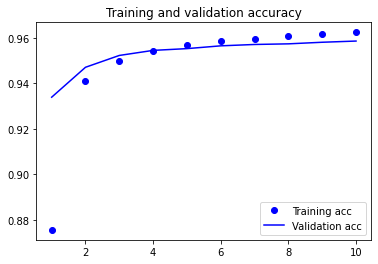

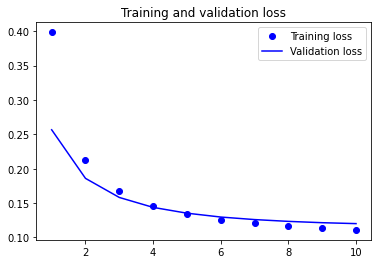

In [25]:
## Plotting the results ##

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [26]:
### testing the model 1 ##

model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

1250/1250 [==============================] - 4s 3ms/step - loss: 0.1177 - acc: 0.9592


[0.11773178726434708, 0.9592000246047974]

In [27]:

############# Model without the embeddings matrix ###########


## defining a model ##

model2 = Sequential()
model2.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model2.add(Flatten())
model2.add(Dense(4, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()


## training the model ##

opt = Adam(lr = 0.0001)
model2.compile(optimizer= opt,
loss='binary_crossentropy',
metrics=['acc'])
history = model2.fit(x_train, y_train,
epochs=7,
batch_size=32,
validation_data=(x_val, y_val))
model2.save_weights('pre_trained_glove_model2.h5')


## Plotting the results ##

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          10000000  
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 10,040,009
Trainable params: 10,040,009
Non-trainable params: 0
_________________________________________________________________
Epoch 1/7
 522/3750 [===>..........................] - ETA: 9:47 - loss: 0.6617 - acc: 0.5901- ETA: 9:49 - loss: 0.6626 -

KeyboardInterrupt: 

In [ ]:
 ### testing the model 2 ##

model2.load_weights('pre_trained_glove_model2.h5')
model2.evaluate(x_test, y_test)